# Decision Tree Models
The Decision Tree model can be used to discover complex linear relationships between variables for either prediction, binary classification or multi-output classification. In the first example of a decision tree algorithm I have opted to examine a commonly used dataset which is freely available in Sci-kit Learn called the 'wine' dataset.

## Classification
The first step involves importing the relevant packages from the Python and SciKit-Learn libraries as well as the Wine dataset.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['quality'] = wine.target

# showing the first 5 entries
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,quality
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Creating this table will help me decide which features to use for the Root Node position for the Decision Tree. Switching out different features in this position can have several deterministic consequences on the overall result. First I have decided to save it as a csv file which enables me to review the dataset in its entirety using spreadsheet analysis but also for preprocessing. It can be useful in case I decide to perform additional feature engineering by creating new data columns which may provide additional insight into the model.

In [3]:
df.to_csv(r'C:/Users/lynst/Documents/GitHub/machine-learning-projects/machine-learning/load_wine.csv')

Looking at some of the common statistics for the dataset using the describe() function:

In [4]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,quality
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [5]:
from sklearn import tree
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data[:, 0:13]
y = wine.target

dtc = tree.DecisionTreeClassifier(max_depth=None)
dtc = dtc.fit(X, y)

Using the plot_tree() method within the DecisionTreeClassifier model and setting the 'filled' attribute to 'True' will color the tree nodes explaining the majority class at each decision point in the tree.

One important idea to note is that the root node which appears at the very top of each decision tree can be changed in order to arrive at the lowest Gini Impurity calculation path. This is done to compare outcomes based on causation associated with different features and the goal is to reduce the Gini Impurity value to that with the lowest impurity, in this case separating the 'Good' and 'Bad' quality wines in the best possible way.

The DecisionTreeClassifier is designed to choose the best split point overall (at the root node) and does a really good job at selecting the next best split points at each decision node.

[Text(0.5657894736842105, 0.9166666666666666, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(0.34210526315789475, 0.75, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(0.21052631578947367, 0.5833333333333334, 'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(0.10526315789473684, 0.4166666666666667, 'X[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(0.05263157894736842, 0.25, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(0.15789473684210525, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3157894736842105, 0.4166666666666667, 'X[2] <= 2.45\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.2631578947368421, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.3684210526315789, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.47368421052631576, 0.5833333333333334, 'X[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 61, 2]'),
 Text(0.421052

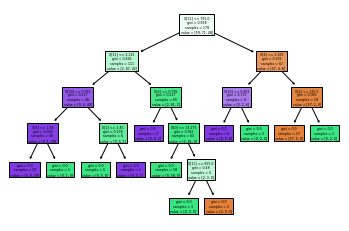

In [6]:
tree.plot_tree(dtc, filled=True)

The visualization of this tree plot can be tidied up using matplotlib:

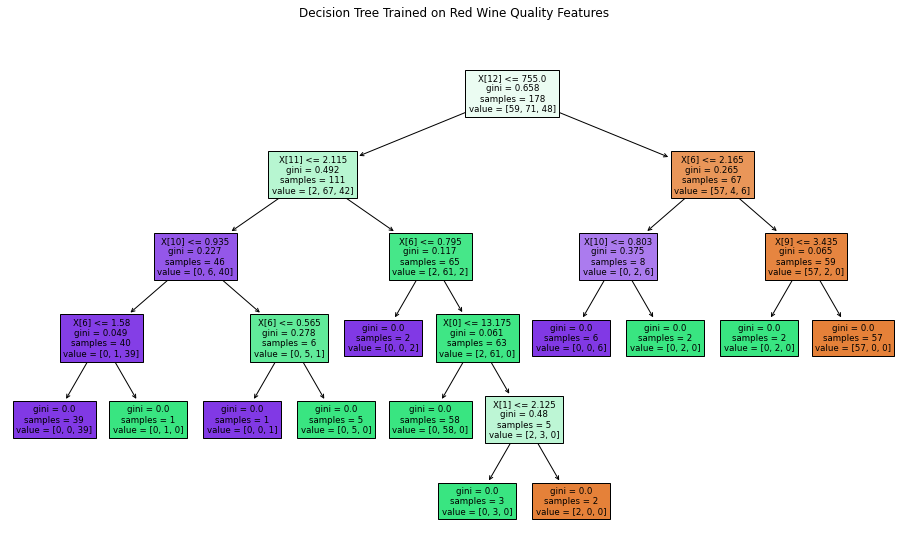

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# important to adjust the size of the plot otherwise it ends up being too small
plt.figure(figsize=(16,9))
dtc = tree.DecisionTreeClassifier().fit(wine.data, wine.target)
plot_tree(dtc, filled=True)
plt.title("Decision Tree Trained on Red Wine Quality Features\n\n")
plt.show()

Repeating the training process but only displaying the 'max_depth' in the classifier to a value of 2 (a depth of 2 levels from the root node), or Tree depth as it's known, is a measure of how many splits a tree can make before it must arrive at a prediction.

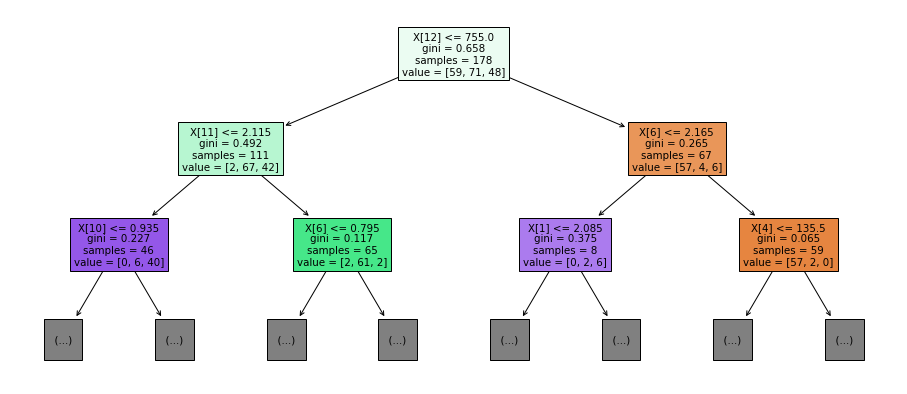

In [8]:
from sklearn import tree
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data[:, 0:13]
y = wine.target

# resizing plot
plt.figure(figsize=(16,7))
dtc = tree.DecisionTreeClassifier(max_depth=None)
dtc = dtc.fit(X, y)
tree.plot_tree(dtc, max_depth=2, filled=True)
plt.show()

## Using Graphviz
This method can be used as an alternative way to display the decision tree and is derived from the SciKit Learn 'tree' model set. It's worth noting I encountered some issues when installing graphviz using Conda (which took considerable time).

In [9]:
#!conda install python-graphviz

Installing with pip may be a better option to get dot file conversion to png format to work.

In [10]:
#!pip install graphviz

Next, in order to create a graphviz export tree diagram 'export_graphviz' must be imported first and then a filepath must be established for the 'dot' file. Then I can derive a graphviz object from this path with a few defining attributes.

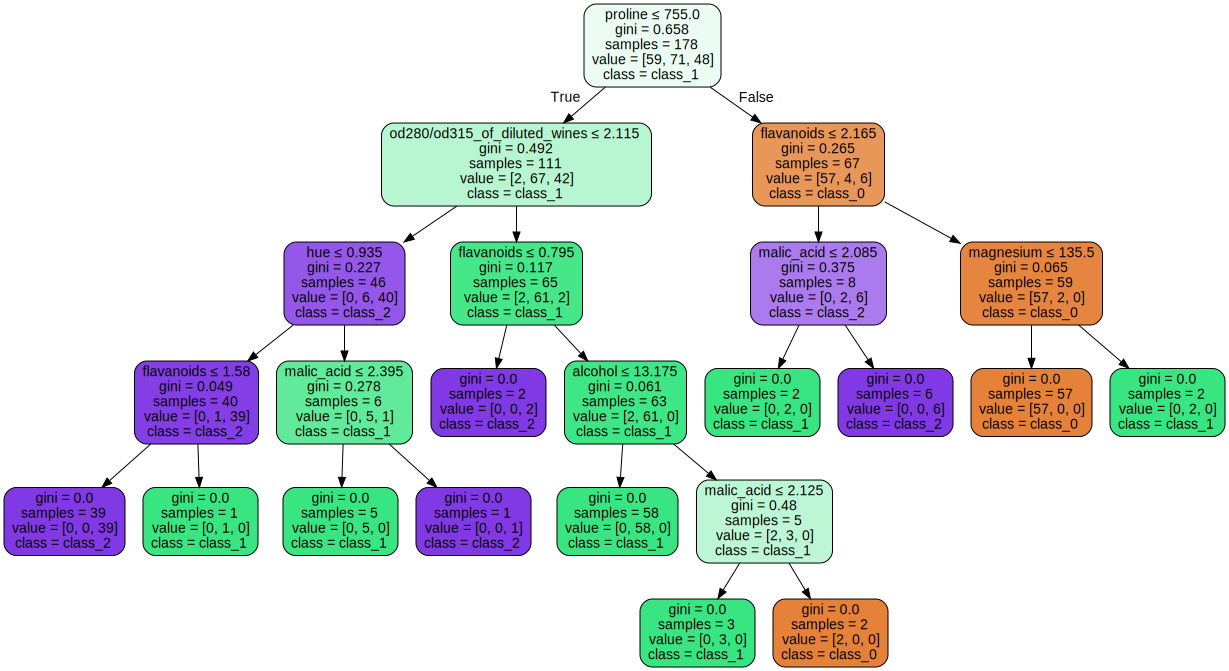

In [11]:
import graphviz
import pydotplus
from sklearn.tree import export_graphviz

#image_path='C:/Users/lynst/Documents/GitHub/machine-learning-projects/machine-learning/wine_tree.dot'

dot_data = tree.export_graphviz(dtc, 
                        out_file=None,
                        feature_names=wine.feature_names,
                        class_names=wine.target_names,
                        rounded=True,
                        special_characters=True,
                        filled=True
                       )

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('original_tree.png')
graph.set_size('"5,5!"')
graph.write_png('resized_tree.png')


graph = graphviz.Source(dot_data)
graph

Converting the dot file to a png file requires a stand-alone installation of graphviz, or a pip installation.

In [12]:
!dot -Tpng wine_tree.dot -o wine_tree.png

Next in order to try and predict unseen target data based on the labels already used, I can categorize ranked estimates for the quality of wine using a four stage model. Splitting the data first into training and test sets, fitting the DecisionTreeClassifier to the training set and using it to predict the test set to make estimates.

It's worth noting that once the predictions are made they will need to be validated using some measure of accuracy. This is determined by the Gini Impurity attribute and the degree to which all the training instances at a node belong to a particular class. A Gini value of 0.0 is completely pure meaning all the instances belong to one class only.

In [13]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[wine.feature_names], df['quality'], random_state=0)

# Initiate a 4 step modeling pattern
# Step 1: import the model to use
from sklearn.tree import DecisionTreeClassifier

# Step 2: Make an instance of the Model and set criterion parameter to gini
dtc = DecisionTreeClassifier(criterion='gini', max_depth = 2, random_state = 0)

# Step 3: Train the model on the data
dtc.fit(X_train, y_train)

# Step 4: Predict labels of unseen (test) data
dtc.predict(X_test)

array([0, 2, 0, 0, 1, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 1,
       1])

The total number of entries in the 'wine' dataset:

In [14]:
df.count()

alcohol                         178
malic_acid                      178
ash                             178
alcalinity_of_ash               178
magnesium                       178
total_phenols                   178
flavanoids                      178
nonflavanoid_phenols            178
proanthocyanins                 178
color_intensity                 178
hue                             178
od280/od315_of_diluted_wines    178
proline                         178
quality                         178
dtype: int64

Finding the size of the training set for the features and targets first. Note there are thirteen features in each and one target column: 

In [15]:
print(X_train.shape)
print(y_train.shape)

(133, 13)
(133,)


And the size of the test set for the features and targets:

In [16]:
print(X_test.shape)
print(y_test.shape)

(45, 13)
(45,)


The action of using the predict function provides 45 estimates (25%) for the test set values based on the training data (75%). Let's see if there's any improvement if I were to change the train-test-split test size to 0.2, or 20%.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df[wine.feature_names], df['quality'], random_state=0, test_size=0.2)
dtc = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)
dtc.fit(X_train, y_train)
predictions = dtc.predict(X_test)
predictions

array([0, 2, 0, 0, 1, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0])

# Score
The score used is from the metrics library and is specifically for multi-class classification measuring the success rate for subset accuracy. Essentially the accuracy score measures the number of times the y predictions are correct given the actual y target values, for example using a 1-d array to list the values in 'y_pred' and 'y_true', then applying the accuracy score as below.
Assume there are only 4 values, the code would look a little like this:

In [18]:
print(y_test)

54     0
151    2
63     1
55     0
123    1
121    1
7      0
160    2
106    1
90     1
141    2
146    2
5      0
98     1
168    2
80     1
33     0
18     0
61     1
51     0
66     1
37     0
4      0
104    1
60     1
111    1
126    1
86     1
112    1
164    2
26     0
56     0
129    1
45     0
8      0
44     0
Name: quality, dtype: int32


In [19]:
# y_test can be re-named to represent the actual y_true values:
y_true = y_test

y_true = [0,2,1,0,1,1,0,2,1,1,2,2,0,1,2,1,0,0,1,0,1,0,0,1,1,1,1,1,1,2,0,0,1,0,0,0]
y_pred = [0,2,0,0,1,0,0,2,1,1,2,2,0,0,2,1,0,0,2,0,0,0,0,1,1,1,0,1,2,2,0,0,1,0,0,0]

One way to calculate the total number of accurately predicted observations

In [20]:
y_total = 36
y_pred_correct = 30

accuracy = (y_pred_correct / y_total) * 100
print(accuracy)

83.33333333333334


The same measurement can be achieved by applying the 'accuracy_score' function after training the decision tree model and fitting the data.

In [21]:
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)
y_test = dtc.predict(X_test)
# rounding to 5 decimal places
acc_dtc = round(accuracy_score(predictions, y_test) * 100, 5)
print(acc_dtc)

83.33333


So, in terms of evaluation, this model does not inspire a terrific amount of confidence in predicting unseen data correctly which is where parameter tuning will be required to improve upon this score.

Taking a look at the correlation between various features may help to establish some ideas for engineering better optimization solutions. Then I can try fine-tuning the chosen model afterwards.

In [22]:
correlation = df.corr()
print(correlation)

                               alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   
quality                      -0.328222    0.437776 -0.049643   

                              alcalinit

Looking at the target column entitled 'quality' the highest positive correlation is with 'alcalinity_of_ash' at 0.517859. The highest negative correlated feature is 'flavanoids' at -0.847498.

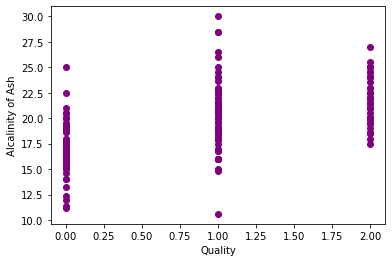

In [27]:
plt.scatter(df['quality'], df['alcalinity_of_ash'], marker='o', color='purple')
plt.xlabel('Quality')
plt.ylabel('Alcalinity of Ash')
plt.show()

So the concentration of values centres around the three classes, or categories of quality which are 0, 1 and 2 with successively higher alcalinity of ash from 0 through 2. It's important to note that the range of values generally start at slightly higher minimums for each quality type.

Next, trying to estimate the probability of each class occurring based on chosen decision boundaries, I already know the first major decision boundary is that 'proline' is less than or equal to 755.0. This is the first major decision boundary splits the data samples into 111 entries which are less than or equal to 755.0 and 67 which are not.

Calculating the probabilities of each class occurring is as follows (given a max_depth of 2 layers):

In [24]:
dtc.predict_proba([[2.115, 2.165]])

C:\Users\lynst\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but DecisionTreeClassifier is expecting 13 features as input.

## Decision Tree Model Selection
The following example will continue with the price prediction theme for Bitcoin crypto-currency with relatively fewer features than the classification example. Next, it's time to apply a Decision Tree Regression model to the entire dataset before seeking further improvement in prediction accuracy and lowering variance.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

# select data for modeling
bitcoin = pd.read_csv("C:/Users/lynst/Documents/GitHub/machine-learning-projects/machine-learning/BTC_CAD.csv")

#load data into dataframe
df = pd.DataFrame(bitcoin).dropna(axis=0)
# select features and target data
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

## Split the Dataset into Train and Test Subsets

In [ ]:
# split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
# train and fit the decision tree model
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

In [ ]:
# predict
y_pred = tree_reg.predict(X_train)

Now trying a prediction on the working linear model (first 5 values):

In [ ]:
print(y_pred[:5])

Measuring the RMSE and r-squared score for the linear model (based on training set):

In [ ]:
y_pred = tree_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)
    
r2_train = r2_score(y_train, y_pred)
print(r2_train)

This definitely appears to be overfitting with perfect scores for both RMSE and r-squared. Let's see if there is a different outcome for the test data.

In [ ]:
y_pred = tree_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)
    
r2_test = r2_score(y_test, y_pred)
print(r2_test)

This appears unlikely also. In order to establish a more likely outcome I will try dividing the dataframe into several smaller training and validation sets and perform the decision tree analysis on each. This is done using K-Fold Cross Validation.

## Cross Validation
This method will evaluate the Decsion Tree model by splitting the training set into several smaller training and validation sets for training and evaluation separately. This is achieved by using the K-fold cross validation technique and I have split the data into 10 separate folds, cv=10 (which can be changed).

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
r2_test = r2_score(y_test, y_pred)
                         
def display_scores(scores):
    print("Scores:", scores)
    print("Mean", scores.mean())
    print("Standard Deviation", scores.std())
    print("R-Squared:", r2_test)
          
display_scores(tree_rmse_scores)

Comparing the scores from cross validation to those from the linear regression model:

In [ ]:
# instantiate model
lin_reg = LinearRegression()

# fit model
lin_reg.fit(X_train, y_train)

lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

# Evaluation
The linear regression model appears to reduce the Standard Error but the accuracy for the estimates is the same.

In [ ]:
# pickle file to go here

# Print Dependencies
Dependences are fundamental to record the **computational environment**.   

- Use [watermark](https://github.com/rasbt/watermark) to print version of python, ipython, and packages, and characteristics of the computer

In [ ]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p wget,pandas,numpy,watermark,tarfile,urllib3,matplotlib,seaborn,sklearn 

# date
print (" ")
%watermark -u -n -t -z 